In [1]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import join
import cv2
import pandas
import os
import random

In [2]:
# Set the path of the input folder 

data = "C:/Users/plote/Desktop/ownDataset/train"

# List out the directories inside the main input folder

folders = os.listdir(data)

print(folders)

['Shirt', 'Tshirt']


In [3]:
image_names = []
train_labels = []
train_images = []

size = 100,100

for folder in folders:
    for file in os.listdir(os.path.join(data,folder)):
        if file.endswith("jpg"):
            image_names.append(os.path.join(data,folder,file))
            train_labels.append(folder)
            img = cv2.imread(os.path.join(data,folder,file))
            im = cv2.resize(img,size)
            train_images.append(im)
        else:
            continue

In [4]:
# Transform the image array to a numpy type

train = np.array(train_images)
train.shape

(7805, 100, 100, 3)

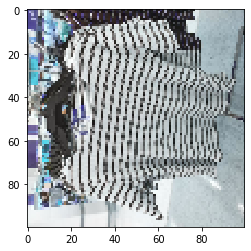

In [5]:
plt.imshow(im)

In [6]:
train = train.astype('float32') / 255.0

In [7]:
label_dummies = pandas.get_dummies(train_labels)

labels =  label_dummies.values.argmax(1)

In [8]:
pandas.unique(train_labels)

array(['Shirt', 'Tshirt'], dtype=object)

In [9]:
pandas.unique(labels)

array([0, 1], dtype=int64)

In [10]:
union_list = list(zip(train, labels))
random.shuffle(union_list)
train,labels = zip(*union_list)

In [11]:
train = np.array(train)
from keras.utils.np_utils import to_categorical
labels = to_categorical(labels)

Using TensorFlow backend.


In [12]:
# Develop a sequential model using tensorflow keras
model = keras.Sequential([
    
    keras.layers.InputLayer(input_shape=(100,100,3)),
    
    keras.layers.Conv2D(64, (3,3), strides=(1, 1), padding='valid',  data_format="channels_last" ,activation='relu'),
    keras.layers.Conv2D(64, (3,3), strides=(1, 1), padding='valid',  data_format="channels_last" ,activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(128, (3,3), strides=(1, 1), padding='valid',  data_format="channels_last" ,activation='relu'),
    keras.layers.Conv2D(128, (3,3), strides=(1, 1), padding='valid',  data_format="channels_last" ,activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Conv2D(256, (3,3), strides=(1, 1), padding='valid',  data_format="channels_last" ,activation='relu'),
    keras.layers.Conv2D(256, (3,3), strides=(1, 1), padding='valid',  data_format="channels_last" ,activation='relu'),
    keras.layers.Conv2D(256, (3,3), strides=(1, 1), padding='valid',  data_format="channels_last" ,activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    
    keras.layers.Conv2D(512, (3,3), strides=(1, 1), padding='valid',  data_format="channels_last" ,activation='relu'),
    keras.layers.Conv2D(512, (3,3), strides=(1, 1), padding='valid',  data_format="channels_last" ,activation='relu'),
    keras.layers.Conv2D(512, (3,3), strides=(1, 1), padding='valid',  data_format="channels_last" ,activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(4096, activation=tf.nn.relu),
    keras.layers.Dense(units=2,activation=tf.nn.softmax)
])

# Compute the model parameters
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

W0704 01:39:54.280387  4740 deprecation.py:506] From C:\Users\plote\Anaconda3\envs\FinalProject\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 44, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 256)       2

In [ ]:
model.fit(train,labels, epochs=100, batch_size=32, validation_split=0.2)

Train on 5463 samples, validate on 2342 samples
Epoch 1/100
5463/5463 [==============================] - 57s 10ms/sample - loss: 0.6952 - acc: 0.5232 - val_loss: 0.6904 - val_acc: 0.5371
Epoch 2/100
5463/5463 [==============================] - 46s 8ms/sample - loss: 0.6913 - acc: 0.5321 - val_loss: 0.6905 - val_acc: 0.5371
Epoch 3/100
5463/5463 [==============================] - 45s 8ms/sample - loss: 0.6916 - acc: 0.5321 - val_loss: 0.6906 - val_acc: 0.5371
Epoch 4/100
5463/5463 [==============================] - 45s 8ms/sample - loss: 0.6915 - acc: 0.5321 - val_loss: 0.6908 - val_acc: 0.5371
Epoch 5/100
5463/5463 [==============================] - 45s 8ms/sample - loss: 0.6912 - acc: 0.5321 - val_loss: 0.6904 - val_acc: 0.5371
Epoch 6/100
5463/5463 [==============================] - 45s 8ms/sample - loss: 0.6911 - acc: 0.5321 - val_loss: 0.6905 - val_acc: 0.5371
Epoch 7/100
5463/5463 [==============================] - 45s 8ms/sample - loss: 0.6914 - acc: 0.5321 - val_loss: 0.6904 - v